In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<h1><center>BRUTE FORCE</center></h1>

In [2]:
brute_time = pd.read_csv("time2.csv")

In [3]:
brute_time.head(5)

,num_of_particles,t_point_create,t_point_write,t_init,t_brute
0,100,441,2401,71,5749
1,100,532,1645,84,6665
2,100,448,1964,106,6645
3,300,1272,3490,241,46588
4,300,1158,4714,226,46572


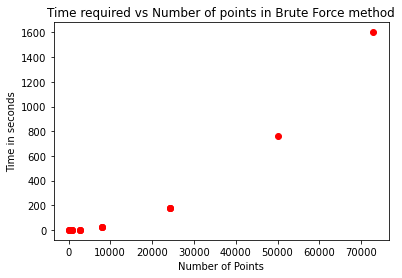

In [4]:
plt.title("Time required vs Number of points in Brute Force method")
plt.xlabel("Number of Points")
plt.ylabel("Time in seconds")
plt.scatter(x=brute_time.num_of_particles, y=brute_time.t_brute/10**6, color="r", label="Time points from program run")
plt.show()

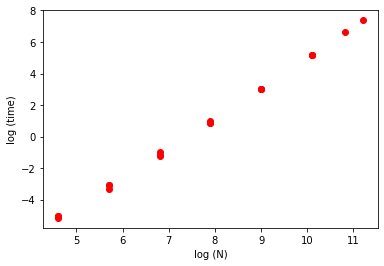

In [63]:
x = np.log(brute_time.num_of_particles)
y = np.log(brute_time.t_brute/10**6)
plt.xlabel("log (N)")
plt.ylabel("log (time)")
plt.scatter(x, y, color="r")
plt.show()

## Linear Regression to find order

In [64]:
m,c,a = 0,0,0.02

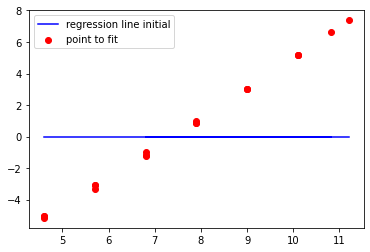

In [65]:
plt.plot(x,m*x+c,color = "b",label="regression line initial")
plt.scatter(x, y, color="r", label="point to fit")
plt.legend()
plt.show()

In [66]:
error = 0
error_diff = 1
while error_diff>0.0001:
    diff = y - (m*x + c)
    error_diff = abs(np.sum(diff**2) - error)
    error = np.sum(diff**2)
    dm = np.sum(diff*x) / len(x)
    dc = np.sum(diff) / len(x)
    m += dm*a
    c += dc*a
    #print('error =', error)
    #print('m=',m,'c=',c,'\n\n')

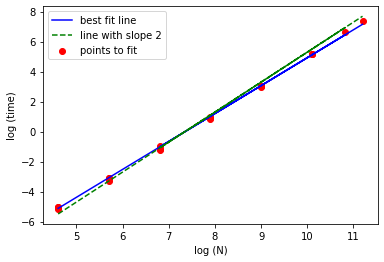

In [67]:
plt.plot(x,m*x+c,color = "b",label="best fit line")
plt.scatter(x, y, color="r", label="points to fit")
plt.plot(x,2*x-14.7,'g--',label="line with slope 2")
plt.xlabel("log (N)")
plt.ylabel("log (time)")
plt.legend()
plt.show()

In [11]:
m,c

(1.862328715737887, -13.69497457577653)

#### As slope is nearly equal to 2, time complexity of brute force method is O(n^2)

<h1><center>GRID METHOD</center></h1>

In [75]:
time = pd.read_csv("gridtime.csv")

In [76]:
time[time['NUM_OF_PARTICLES']==100].head(5)

,NUM_OF_PARTICLES,GRID_SIZE,t_grid,t_gridcalc
0,100,1,136,97324
1,100,1,122,98388
2,100,1,95,97166
3,100,2,99,18773
4,100,2,188,20267


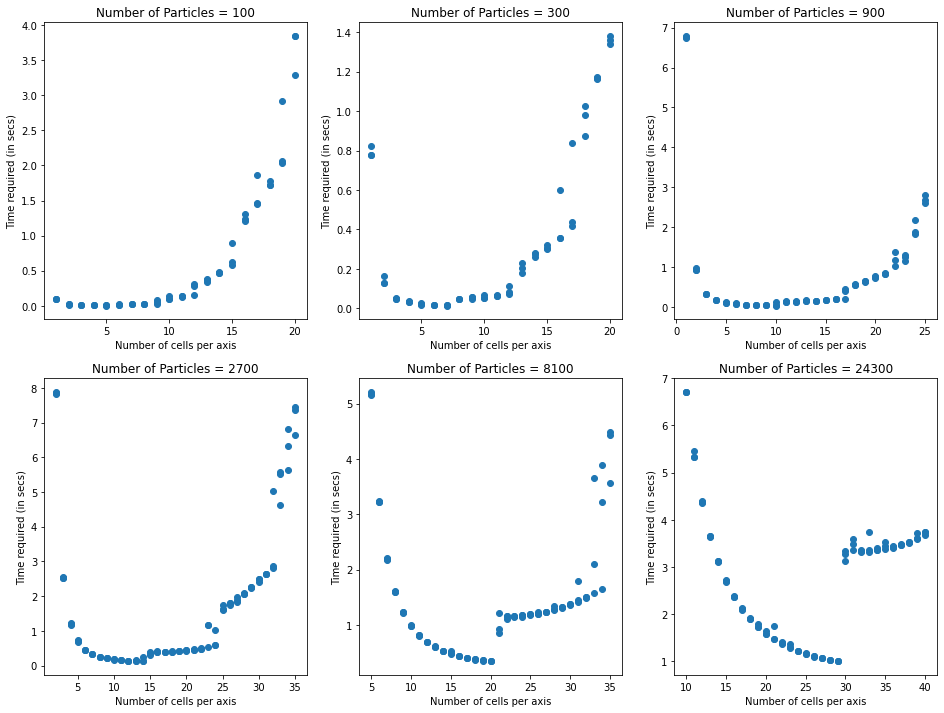

In [77]:
fig, axes = plt.subplots(2,3,figsize=(16, 12))

axes[0,0].set_xlabel("Number of cells per axis")
axes[0,0].set_ylabel("Time required (in secs)")
axes[0,0].set_title("Number of Particles = 100")
axes[0,0].scatter(time[time['NUM_OF_PARTICLES']==100]['GRID_SIZE'], time[time['NUM_OF_PARTICLES']==100]['t_gridcalc']/10**6)

axes[0,1].set_xlabel("Number of cells per axis")
axes[0,1].set_ylabel("Time required (in secs)")
axes[0,1].set_title("Number of Particles = 300")
axes[0,1].scatter(time[time['NUM_OF_PARTICLES']==300]['GRID_SIZE'], time[time['NUM_OF_PARTICLES']==300]['t_gridcalc']/10**6)

axes[0,2].set_xlabel("Number of cells per axis")
axes[0,2].set_ylabel("Time required (in secs)")
axes[0,2].set_title("Number of Particles = 900")
axes[0,2].scatter(time[time['NUM_OF_PARTICLES']==900]['GRID_SIZE'], time[time['NUM_OF_PARTICLES']==900]['t_gridcalc']/10**6)

axes[1,0].set_xlabel("Number of cells per axis")
axes[1,0].set_ylabel("Time required (in secs)")
axes[1,0].set_title("Number of Particles = 2700")
axes[1,0].scatter(time[time['NUM_OF_PARTICLES']==2700]['GRID_SIZE'], time[time['NUM_OF_PARTICLES']==2700]['t_gridcalc']/10**6)

axes[1,1].set_xlabel("Number of cells per axis")
axes[1,1].set_ylabel("Time required (in secs)")
axes[1,1].set_title("Number of Particles = 8100")
axes[1,1].scatter(time[time['NUM_OF_PARTICLES']==8100]['GRID_SIZE'], time[time['NUM_OF_PARTICLES']==8100]['t_gridcalc']/10**6)

axes[1,2].set_xlabel("Number of cells per axis")
axes[1,2].set_ylabel("Time required (in secs)")
axes[1,2].set_title("Number of Particles = 24300")
axes[1,2].scatter(time[time['NUM_OF_PARTICLES']==24300]['GRID_SIZE'], time[time['NUM_OF_PARTICLES']==24300]['t_gridcalc']/10**6)

plt.show()

In [78]:
x=np.array((100,300,900,2700,8100,24300))
y=np.array((4,7,9,14,20,29))

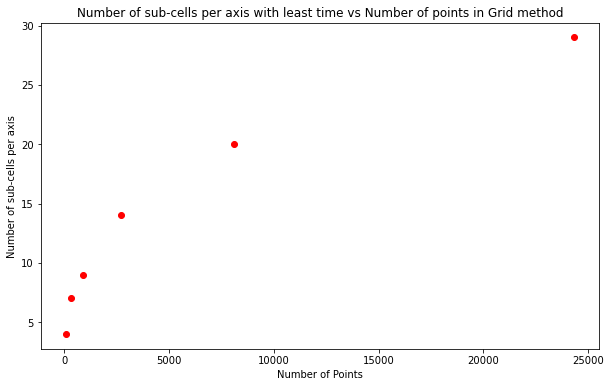

In [79]:
plt.figure(figsize=(10, 6))
plt.title("Number of sub-cells per axis with least time vs Number of points in Grid method")
plt.xlabel("Number of Points")
plt.ylabel("Number of sub-cells per axis")
plt.scatter(x,y,color='r')
plt.show()

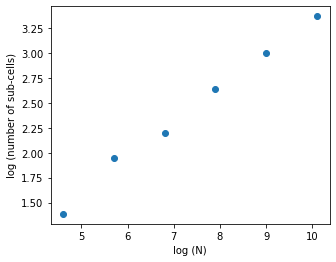

In [80]:
x = np.log(np.array((100,300,900,2700,8100,24300)))
y = np.log(np.array((4,7,9,14,20,29)))

plt.figure(figsize=(5, 4))
plt.xlabel("log (N)")
plt.ylabel("log (number of sub-cells)")
plt.scatter(x,y)
plt.show()

## Linear regression to find best number of cell per axis

In [81]:
m,c,a = 0,0,0.01

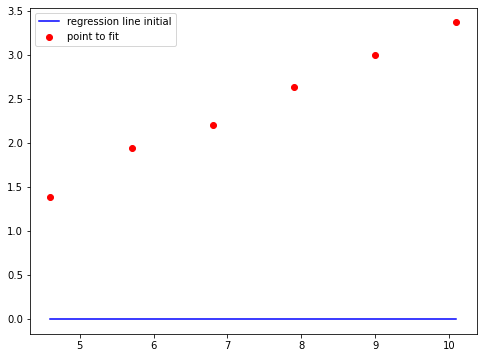

In [82]:
plt.figure(figsize=(8, 6))
plt.plot(x,m*x+c,color = "b",label="regression line initial")
plt.scatter(x, y, color="r", label="point to fit")
plt.legend()
plt.show()

In [83]:
error = 0
error_diff = 1
while error_diff>0.0001:
    diff = y - (m*x + c)
    error_diff = abs(np.sum(diff**2) - error)
    error = np.sum(diff**2)
    dm = np.sum(diff*x) / len(x)
    dc = np.sum(diff) / len(x)
    m += dm*a
    c += dc*a
    print('error =', error)
    print('m=',m,'c=',c,'\n\n')

error = 37.813890857572886
m= 0.1904082542684753 c= 0.024219190867778576 


error = 6.536817330435416
m= 0.26942219249505384 c= 0.03419794446956742 


error = 1.152083156471877
m= 0.3022159571856875 c= 0.038268042121558384 


error = 0.22502264302079084
m= 0.3158318601146283 c= 0.039886539300612776 


error = 0.065403594350079
m= 0.32149040374039534 c= 0.0404878510486638 


error = 0.037908723311451294
m= 0.32384724311659785 c= 0.04066715047613855 


error = 0.03316061569213903
m= 0.32483412096863157 c= 0.04067138912752623 


error = 0.03232865096133998
m= 0.32525256359580257 c= 0.040603033084394585 


error = 0.03217091419510103
m= 0.3254351434487283 c= 0.04050459795127449 


error = 0.03212927122654839
m= 0.32551985280105783 c= 0.040393724444780864 




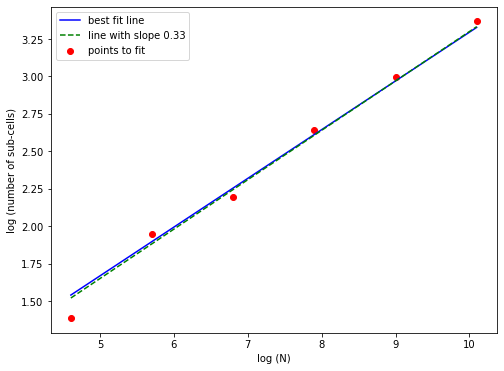

In [86]:
plt.figure(figsize=(8, 6))
plt.plot(x,m*x+c,color = "b",label="best fit line")
plt.scatter(x, y, color="r", label="points to fit")
plt.plot(x,0.33*x,"g--", label="line with slope 0.33")
plt.xlabel("log (N)")
plt.ylabel("log (number of sub-cells)")
plt.legend()
plt.show()

In [85]:
m,c

(0.32551985280105783, 0.040393724444780864)

#### As slope is nearly 0.33 and intercept nearly 0  the ideal value of cells per axis is N^(0.33)

## Time complexity of Grid method

In [88]:
time = pd.read_csv("gridtime2.csv")

In [89]:
time.head()

,NUM_OF_PARTICLES,GRID_SIZE,t_grid,t_gridcalc
0,1000,9,1801,51817
1,1000,9,3220,57643
2,1000,9,1525,83301
3,5000,16,6221,237806
4,5000,16,6334,224608


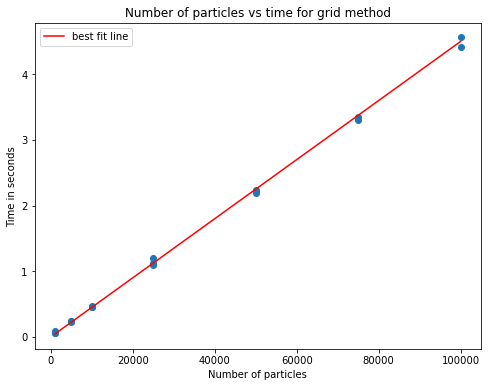

In [116]:
plt.figure(figsize=(8, 6))
plt.scatter(x=time['NUM_OF_PARTICLES'],y=(time['t_grid']+time['t_gridcalc'])/10**6)
plt.plot(time['NUM_OF_PARTICLES'],time['NUM_OF_PARTICLES']/(10**5)*4.5,'r',label="best fit line")
plt.title("Number of particles vs time for grid method")
plt.xlabel("Number of particles")
plt.ylabel("Time in seconds")
plt.legend()
plt.show()

#### As the plot is linear, time complexity of grid method is O(N)